In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [74]:
df = pd.read_csv('/Users/sammarcustaylor/Desktop/Titanic_Data/titanic_clean.csv')

In [75]:
features = df.drop('Survived', axis = 1)
labels = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 40)

Regression is a statistical process for estimating the relationships among variables, often to make a prediction 
about some outcome 
Logistic Regression is a form of regression where the target variable is binary, it is based off a sigmoid curve 
In linear regression it is impossible to fit a line to  binary data.
The rules below are not hard rules, but rather suggestions. 

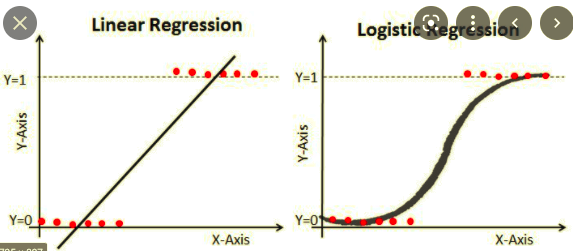

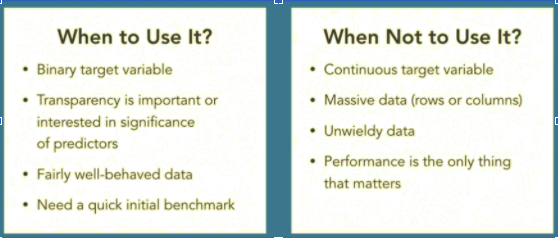

# LR Hyperparameters

LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)

C hyperparameter is a regularization parameter in logitistic regression that controls how closely the model fits to the training data. It is a technique used to reduce overfitting by discouraging overly complex models in some way. 

When C is low, less complex, there is underfitting, when C is high, more complex, there is overfitting 

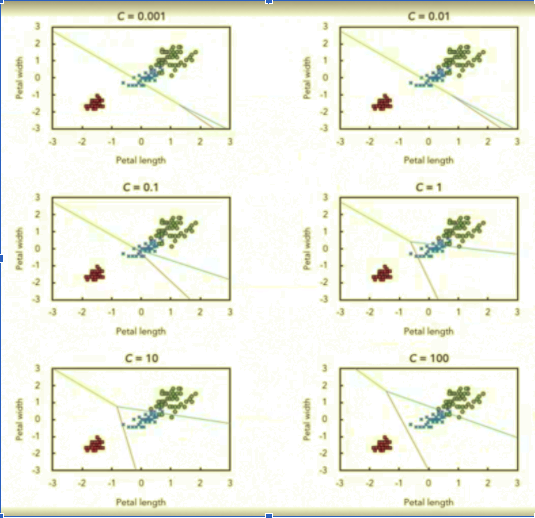

# SVM Hyperparameters

A support vector machine is a classifier that finds an optimal hyperplane that maximizes the margin between two classes

What line gives us the best chance to classify additional examples in each of these two classes. You would probably want a line that is evenly spaced between the two classifications to give a little bit of buffer. 
SVM seeks to maximize the distance between the decision boundary and the nearest points. 

A hyperplane is a generalized term to identify your decision boundary in a N dimensional space. 

When we have data that cannot be seperated by a straight line or a hyperplane this leads to utilizing a kernel trick. This transforms data that is not linearly seperable in N-dimensional space into a higher dimension where it is linearly seperable. Seen below in second photo. 

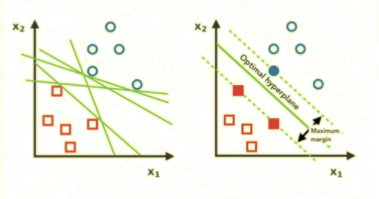

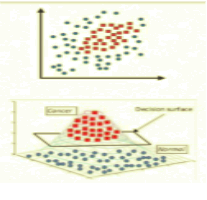

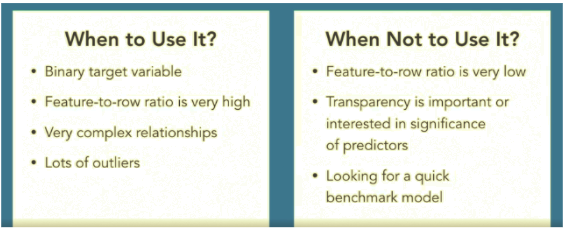

SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

kernel trick transforms data that is not linearly seperable in n-dimensioal space to a higher dimension where it is linearly seperable.
The C hyperparameter is a penalty term that determines how closely a model fits the data (regularization parameter)

- High value of C means low regulirzation, and potential for overfitting
- Low value of C means high regularization. Inherently model will be more willing to misclassify for capturing better overall pattern. This leads to larger margin of hyperplane and nearest points. 


# Utilizing Grid Search CV Logistic Regression

In [76]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [77]:
lr = LogisticRegression()

parameters = {
    'C' : [0.001, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv = 5)
cv.fit(X_train, y_train.values)

/Users/sammarcustaylor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000]})

In [78]:
# lr performance
print_results(cv)

lr_model = cv.best_estimator_

BEST PARAMS: {'C': 1000}

0.68 (+/-0.074) for {'C': 0.001}
0.78 (+/-0.023) for {'C': 0.1}
0.79 (+/-0.04) for {'C': 1}
0.793 (+/-0.042) for {'C': 10}
0.793 (+/-0.042) for {'C': 100}
0.796 (+/-0.045) for {'C': 1000}


# Grid Search CV Support Vector Machine

In [79]:
svc = SVC()
parameters = {
    'kernel' : ['linear', 'rbf'],
    'C' : [0.1, 1, 10]
}
cv = GridSearchCV(svc, parameters, cv = 5)
cv.fit(X_train, y_train.values)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [61]:
print_results(cv)

SVC_model = cv.best_estimator_

# C hyperparameter is not having any impact on accuracy for linear kernel. In addition lienar kernel is doing 
# drastically better. That suggest data is linearly seperable. 

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.789 (+/-0.023) for {'C': 0.1, 'kernel': 'linear'}
0.674 (+/-0.052) for {'C': 0.1, 'kernel': 'rbf'}
0.789 (+/-0.023) for {'C': 1, 'kernel': 'linear'}
0.677 (+/-0.055) for {'C': 1, 'kernel': 'rbf'}
0.789 (+/-0.023) for {'C': 10, 'kernel': 'linear'}
0.692 (+/-0.095) for {'C': 10, 'kernel': 'rbf'}


# Evaluate on Test Set

In [69]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred =  model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                  accuracy,
                                                                                  precision,
                                                                                  recall,
                                                                                  (end - start)))


In [70]:
evaluate_model('Logistic_Regression', lr_model, X_test, y_test)

Logistic_Regression -- Accuracy: 0.821 / Precision: 0.789 / Recall: 0.789 / Latency: 0.1440110206604004ms


In [80]:
evaluate_model('Support Vector Machine', SVC_model, X_train, y_train)

Support Vector Machine -- Accuracy: 0.789 / Precision: 0.737 / Recall: 0.668 / Latency: 0.027975797653198242ms


In [ ]:
# Logistic Regression proves to be the dominant algorithm in all three phases of Accuracy, Precision, and Recall. 